# THE PROBLEM & GOAL

**Problem:**

Once upon a time, in a far-off land, there lived a beautiful princess who had fallen gravely ill. The king and queen of the land tried everything in their power to cure her, but none of the remedies they tried seemed to work

A group of local villagers approached the king and queen and told them about a set of magical ingredients that were said to have the power to cure any ailment. However, the villagers warned that these ingredients could be volatile in their effects, in addition, due to the recent droughts, only so many of the ingredients may be available at any given time, and only a skilled alchemist would be able to determine if a specific combination of these particularly volatile and scarce ingredients would to cure the princess.

The king and queen were desperate to save their daughter, so they set out to find the best alchemist in the land. They searched high and low and finally found an alchemist who had a reputation for being a master of a new magical art known as "Data Science and Machine Learning"

The alchemist first examined the claims of the villagers and the amounts they had taken of each ingredient, along with whether or not it had led to a cure. The alchemist knew that this was their one shot at curing the princess, and they had to get it right.

**Goal:**
- We will be trying to determine how accurate we will be with consistency with given sets of ingredients, as mentioned they are volatile and scarce so we need to be ready for different combinations to be available at any given time.
- These ingredients (features we will use to predict) are as follows:
  - Phoenix Feather
  - Unicorn Horn
  - Dragon's Blood
  - Mermaid Tears
  - Fairy Dust
  - Goblin Toes
  - Witch's Brew
  - Griffin Claw
  - Troll Hair
  - Kraken Ink
  - Minotaur Horn
  - Basellisk Scale
  - Chimera Fang
  
  
- Which will let us determine the target variable which is:
  - Cured (whether the ingredients and quantity combination lead to a cure)

# OUTLINE FOR NOTEBOOK

**Problem Type:**

Classification (Binary)



#PHASE-1


In [ ]:
#importing libraries

import pandas as pd
import numpy as np
#from scipy import stats
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
#from sklearn.utils import shuffle

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
# Warnigs ignore
import warnings
warnings.filterwarnings("ignore")

# A) LOAD DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
df =pd.read_csv("/content/drive/My Drive/datasets/data.csv")

#Gaining insights from data

In [ ]:
# Print the ammount of rows and columns in the dataframe
print("[SHAPE BREAKDOWN]\n{} rows and {} columns".format(df.shape[0], df.shape[1]))

[SHAPE BREAKDOWN]
2338 rows and 14 columns


In [ ]:
# Show the names of each column in the dataframe
print("\n[COLUMN BREAKDOWN]")
print(df.columns)


[COLUMN BREAKDOWN]
Index(['Phoenix Feather', 'Unicorn Horn', 'Dragon's Blood', 'Mermaid Tears',
       'Fairy Dust', 'Goblin Toes', 'Witch's Brew', 'Griffin Claw',
       'Troll Hair', 'Kraken Ink', 'Minotaur Horn', 'Basilisk Scale',
       'Chimera Fang', 'Cured'],
      dtype='object')


In [ ]:
# Look for missing values in the dataframe
#print("[PRE FILLING]\n Total missing values is {}".format(df.isnull().sum().sum()))
#print("\n[PRE FILLING]\n Missing values by column is as follows:")
df.isnull().sum()

Phoenix Feather    0
Unicorn Horn       0
Dragon's Blood     0
Mermaid Tears      0
Fairy Dust         0
Goblin Toes        0
Witch's Brew       0
Griffin Claw       0
Troll Hair         0
Kraken Ink         0
Minotaur Horn      0
Basilisk Scale     0
Chimera Fang       0
Cured              0
dtype: int64

In [ ]:
# Print the first 10 rows of the dataframe
print("\n[FIRST 10 ROWS PREVIEW]")
df.head(10)


[FIRST 10 ROWS PREVIEW]


,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
5,21.9,5.5,11.5,5.0,27.9,20.9,20.5,22.7,33.9,7.4,3.6,38.4,5.2,1
6,30.0,8.6,29.1,26.0,18.6,13.8,3.8,19.1,42.3,17.3,16.8,16.3,4.5,1
7,16.4,12.1,14.2,22.0,15.6,10.4,11.7,18.4,21.0,20.3,4.0,15.7,15.3,0
8,28.4,18.9,30.3,5.6,18.0,9.9,6.2,24.4,14.4,2.7,15.1,41.6,7.0,0
9,11.8,17.7,8.8,22.9,6.1,5.8,15.7,2.6,16.5,23.7,25.2,1.7,1.1,1


<Axes: >

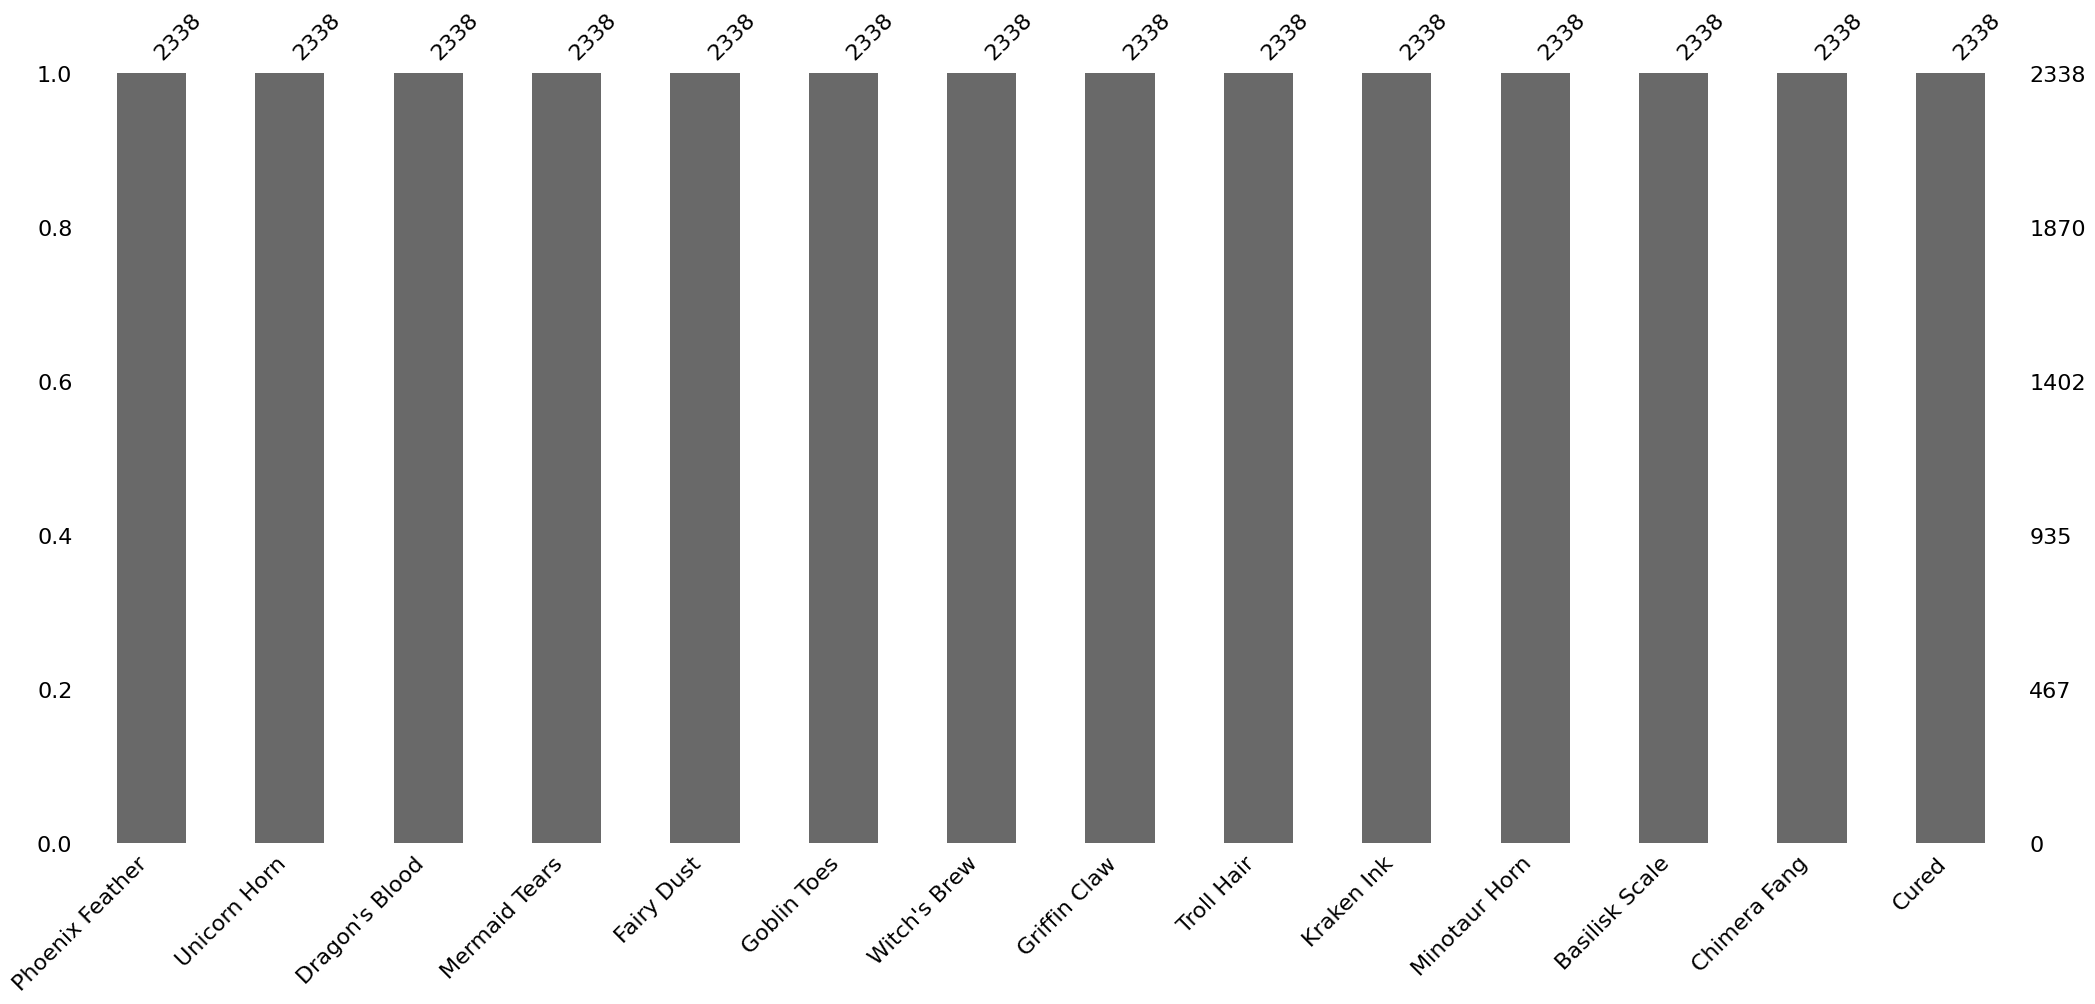

In [ ]:
#It prints if there are any missing values
msno.bar(df)

In [ ]:
# Show the number of unique values in each column
print("[UNIQUE VALUES PER COLUMN]\n")
df.nunique()

[UNIQUE VALUES PER COLUMN]



Phoenix Feather    362
Unicorn Horn       303
Dragon's Blood     351
Mermaid Tears      321
Fairy Dust         351
Goblin Toes        330
Witch's Brew       329
Griffin Claw       341
Troll Hair         379
Kraken Ink         345
Minotaur Horn      295
Basilisk Scale     364
Chimera Fang       330
Cured                2
dtype: int64

## B)Distribution of each columns

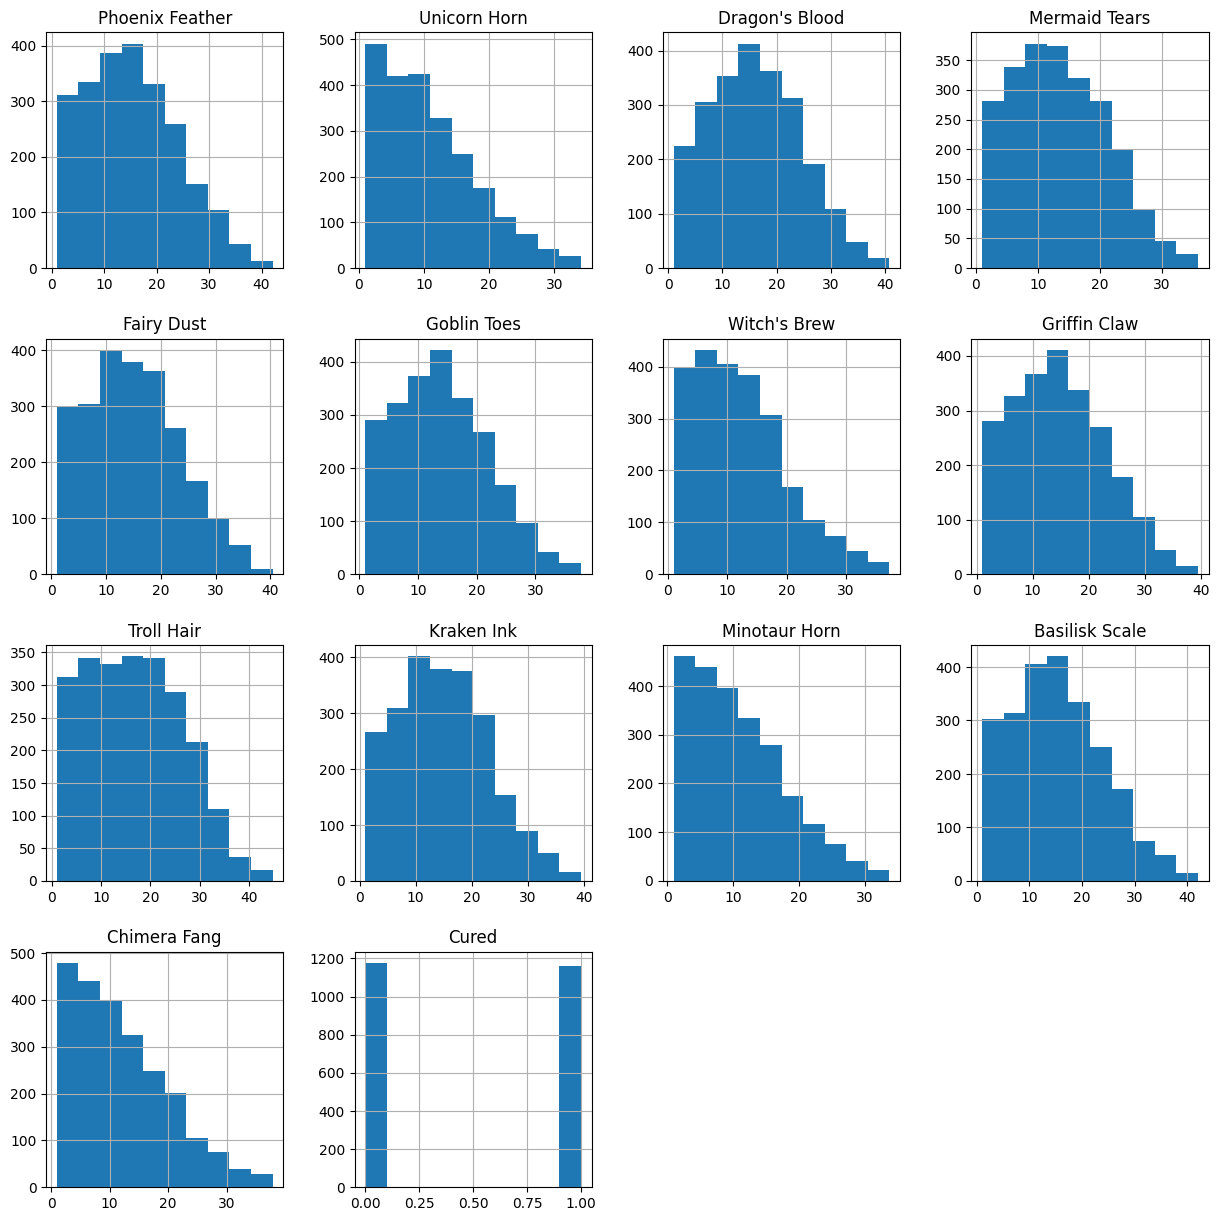

In [ ]:
# Show the distribution of values in each column of the dataframe
df.hist(figsize=(15, 15))
plt.show()


<Axes: xlabel='Cured', ylabel='count'>

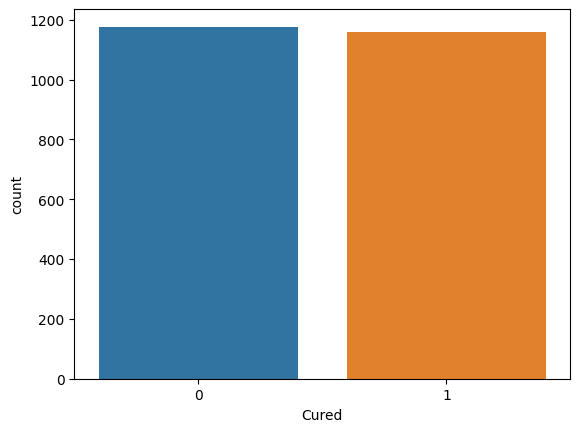

In [ ]:
sns.countplot(data = df, x="Cured")

In [ ]:
y=df.iloc[:, -1]

counts = y.value_counts()

print("Number of zeros: ",counts[0])
print("Number of ones: ", counts[1])

Number of zeros:  1177
Number of ones:  1161


In [ ]:
#This Method gives 
df.describe().T
 

,count,mean,std,min,25%,50%,75%,max
Phoenix Feather,2338.0,15.365697,8.669969,1.0,8.500,14.7,21.300,42.1
Unicorn Horn,2338.0,10.946749,7.225162,1.0,5.300,9.5,15.575,34.1
Dragon's Blood,2338.0,16.115654,8.372518,1.0,9.600,15.8,22.000,40.8
Mermaid Tears,2338.0,13.627973,7.545244,1.0,7.600,13.1,19.000,35.8
Fairy Dust,2338.0,15.069504,8.349340,1.0,8.625,14.5,20.700,40.4
Goblin Toes,2338.0,14.157271,7.831476,1.0,7.900,13.5,19.500,37.8
Witch's Brew,2338.0,12.328914,7.709753,1.0,6.325,11.2,16.900,37.3
Griffin Claw,2338.0,14.911206,8.132678,1.0,8.400,14.4,20.500,39.4
Troll Hair,2338.0,16.871685,9.579027,1.0,8.900,16.3,24.000,44.8
Kraken Ink,2338.0,14.890590,8.014197,1.0,8.800,14.4,20.400,39.5


# PHASE 2:DATA OVERFITTING

In [ ]:
# Split the data into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)
print(y)


[[ 2.4 18.7 18.4 ... 10.5 26.2 12.5]
 [ 2.1  6.  15.  ...  1.5 13.3  6.2]
 [17.2 13.9 23.8 ... 11.1 16.6 11.4]
 ...
 [15.2 33.2  7.2 ...  3.9 18.  19.2]
 [ 2.  17.  33.2 ... 15.7 20.5  2.1]
 [ 6.2  2.6 11.7 ...  3.6 21.8  2.5]]
[0 0 1 ... 1 1 1]


#Single Layer Model Building with 1-neuron and 50 epochs

In [ ]:
# Define the model architecture

model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# M)Train the data using Keras, TensorFlow
history = model.fit(X, y, epochs=50, batch_size=10, verbose=0)


In [ ]:
# N)Print the accuracy
_, accuracy_single_layer = model.evaluate(X, y, verbose=0)
print('Single Layer Model Accuracy: %.2f' % (accuracy_single_layer * 100))

Single Layer Model Accuracy: 87.47


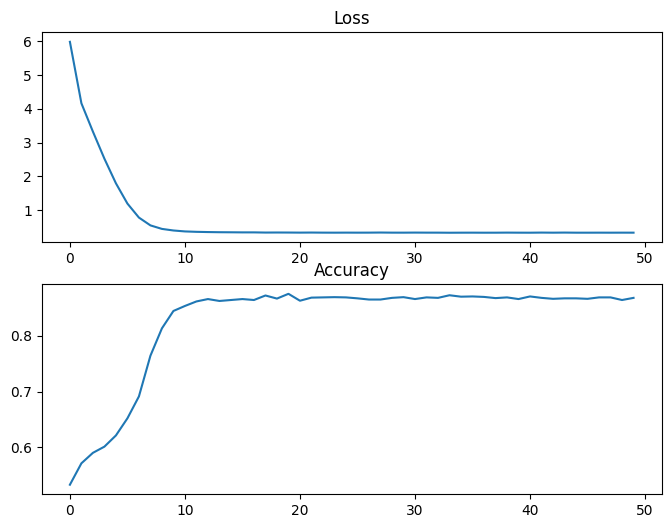

In [ ]:
# Plot the loss and accuracy over epochs
fig, axs = plt.subplots(2, figsize=(8, 6))
axs[0].plot(history.history['loss'])
axs[0].set_title('Loss')
axs[1].plot(history.history['accuracy'])
axs[1].set_title('Accuracy')
plt.show()

In order to increase the training accuracy of a neural network further is to increase the number of epochs or increase the complexity of model architecture by adding more layers and neurons. 

Here the accuracy is 87.67 try to add more layers.

#Model-2 Building with multiple layers having input layer as 2, output as 1 and 80 epochs

In [ ]:
# Define the model architecture
model_2 = Sequential()
model_2.add(Dense(2, input_dim=X.shape[1], activation='sigmoid'))
model_2.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and Adam optimizer
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




In [ ]:
# Train the model for 80 epochs
history = model_2.fit(X, y, epochs=80, batch_size=10, verbose=0)

In [ ]:

# Evaluate the model on the training data and print the accuracy
_, accuracy = model_2.evaluate(X, y, verbose=0)
print('Model 2 Accuracy: %.2f' % (accuracy*100))


Model 2 Accuracy: 88.58


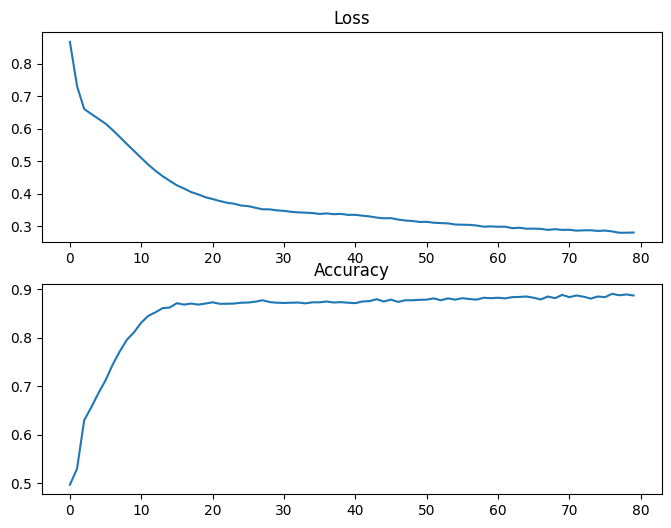

In [ ]:
# Plot the loss and accuracy over epochs
fig, axs = plt.subplots(2, figsize=(8, 6))
axs[0].plot(history.history['loss'])
axs[0].set_title('Loss')
axs[1].plot(history.history['accuracy'])
axs[1].set_title('Accuracy')
plt.show()

In order to increase the training accuracy of a neural network further is to increase the number of epochs or increase the complexity of model architecture by adding more layers and neurons. 

Here the accuracy is 0.9247 try to add more layers.

#Model Building with multiple layers having input layer as 16,hidden layer as 8 and output as 1 and 300 epochs

In [ ]:
# Define a larger neural network with 16 neurons in the input layer, 8 neurons in the hidden layer, and 1 neuron in the output layer
# Define the model architecture

model_3 = Sequential()
model_3.add(Dense(16, input_dim=X.shape[1], activation='sigmoid'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and Adam optimizer
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model for 300 epochs
history = model_3.fit(X, y, epochs=250, batch_size=10, verbose=0)



In [ ]:
# Evaluate the model on the training data and print the accuracy
_, accuracy = model_3.evaluate(X, y, verbose=0)
print('Model 2 Accuracy: %.2f' % (accuracy*100))


Model 2 Accuracy: 99.02


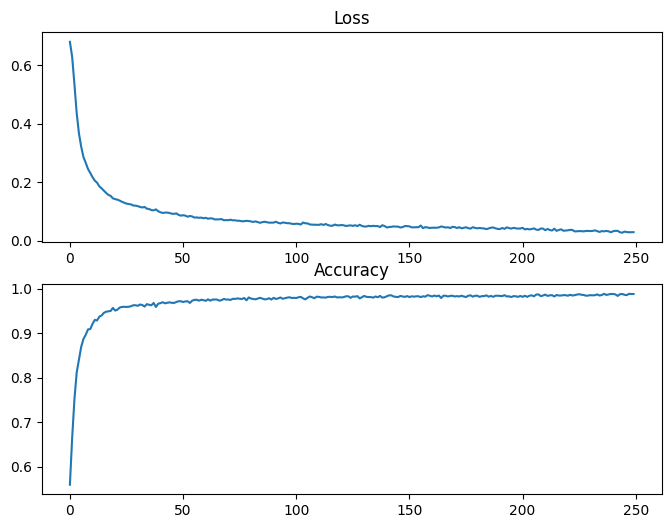

In [ ]:
# Plot the loss and accuracy over epochs
fig, axs = plt.subplots(2, figsize=(8, 6))
axs[0].plot(history.history['loss'])
axs[0].set_title('Loss')
axs[1].plot(history.history['accuracy'])
axs[1].set_title('Accuracy')
plt.show()

#Phase-3

In [ ]:
# Shuffle the data

data= df.sample(frac=1).reset_index(drop=True)


In [ ]:
#Splitting the data
train_data = df.iloc[int(0.3 * len(df)):]
val_data = df.iloc[:int(0.3 * len(df))]

X_TRAIN = train_data.iloc[:, :-1]
Y_TRAIN = train_data.iloc[:, -1]
X_VALID = val_data.iloc[:, :-1]
Y_VALID = val_data.iloc[:, -1]

print("Training data (X_train):")
print(X_TRAIN)
print(Y_TRAIN)




Training data (X_train):
      Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  \
701              30.8           1.5            35.7            2.8   
702              23.0          13.9            17.6            8.3   
703               9.4           3.8             7.3           12.6   
704              12.5           1.3            22.5           23.7   
705               4.6           5.5            38.2           24.7   
...               ...           ...             ...            ...   
2333              9.4           2.2            15.8            5.9   
2334             12.1           7.6            20.6            5.3   
2335             15.2          33.2             7.2           14.5   
2336              2.0          17.0            33.2           13.2   
2337              6.2           2.6            11.7           23.8   

      Fairy Dust  Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  \
701         16.2         19.9          10.4          25.0    

In [ ]:
#Normalize the data
X_TRAIN = (X_TRAIN - X_TRAIN.min()) / (X_TRAIN.max() - X_TRAIN.min())
X_VALID = (X_VALID - X_TRAIN.min()) / (X_TRAIN.max() - X_TRAIN.min())

# Print the normalized data
print("Normalized training data (X_train):")
print(X_TRAIN)
print(Y_TRAIN)

Normalized training data (X_train):
      Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  \
701          0.739454      0.015106        0.887468       0.054381   
702          0.545906      0.389728        0.424552       0.220544   
703          0.208437      0.084592        0.161125       0.350453   
704          0.285360      0.009063        0.549872       0.685801   
705          0.089330      0.135952        0.951407       0.716012   
...               ...           ...             ...            ...   
2333         0.208437      0.036254        0.378517       0.148036   
2334         0.275434      0.199396        0.501279       0.129909   
2335         0.352357      0.972810        0.158568       0.407855   
2336         0.024814      0.483384        0.823529       0.368580   
2337         0.129032      0.048338        0.273657       0.688822   

      Fairy Dust  Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  \
701     0.389744     0.513587      0.258953      0

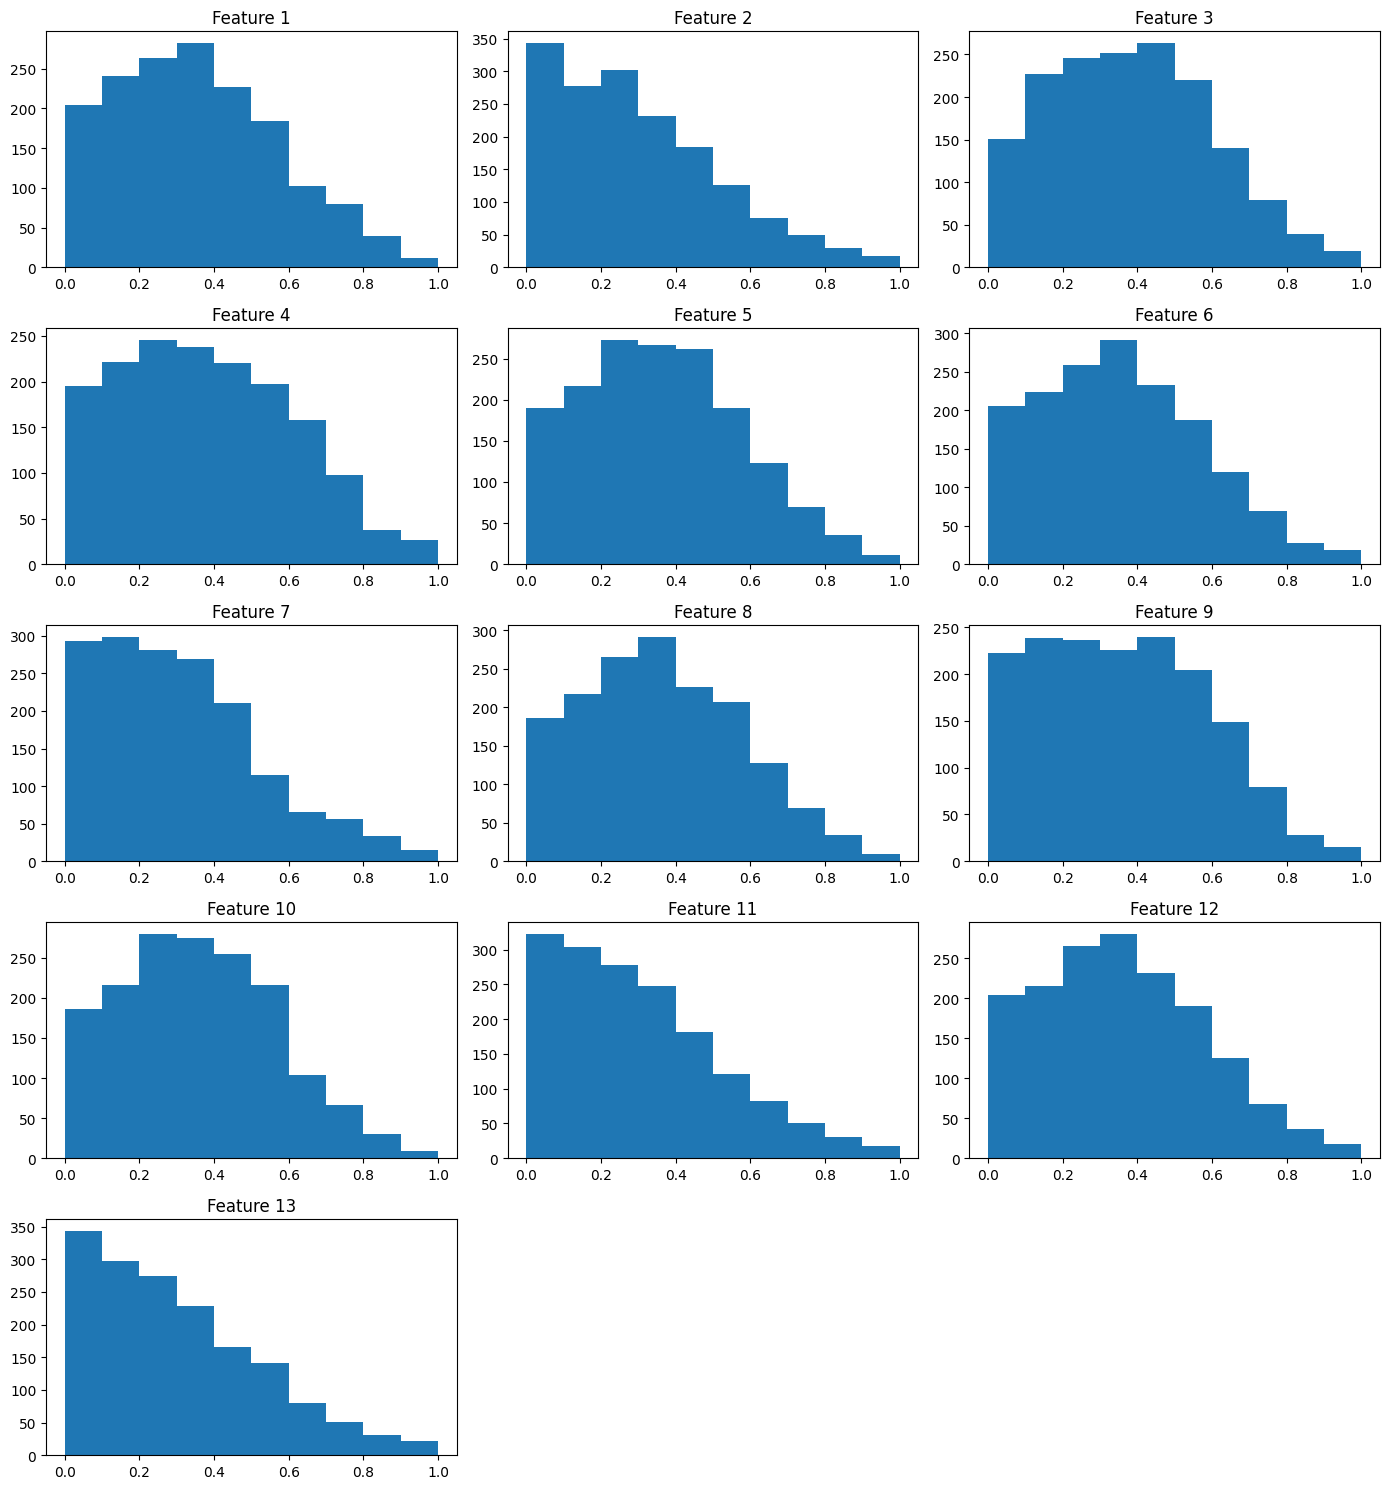

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of the normalized training data
plt.figure(figsize=(14, 15))
for i in range(X_TRAIN.shape[1]):
    plt.subplot(5, 3, i+1)
    plt.hist(X_TRAIN.iloc[:,i])
    plt.title(f'Feature {i+1}')
plt.tight_layout()
plt.show()
plt.savefig('model.png')

#Model building with 1 neuron after splitting the data

In [ ]:
model = Sequential()
model.add(Dense(1,activation='relu',input_shape=(13,)))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Set up model checkpointing

checkpoint_path = "model_save.hdf5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=0)
# Fit the model on the training set
history = model.fit(X_TRAIN,Y_TRAIN, epochs=50, batch_size=32, verbose=0, validation_data=(X_VALID,Y_VALID), callbacks=[cp_callback])



In [ ]:
# Load the best model weights
model.load_weights(checkpoint_path)

52/52 [==============================] - 0s 1ms/step
Training loss : 0.7688774466514587,Training accuracy: 0.6279780268669128, precision: 64.80%, recall: 62.47%, f1-score: 61.14%
22/22 [==============================] - 0s 1ms/step
Validation loss:6.599427700042725,Validation accuracy: 0.5634807348251343, precision: 2.51%, recall: 0.38%, f1-score: 0.65%


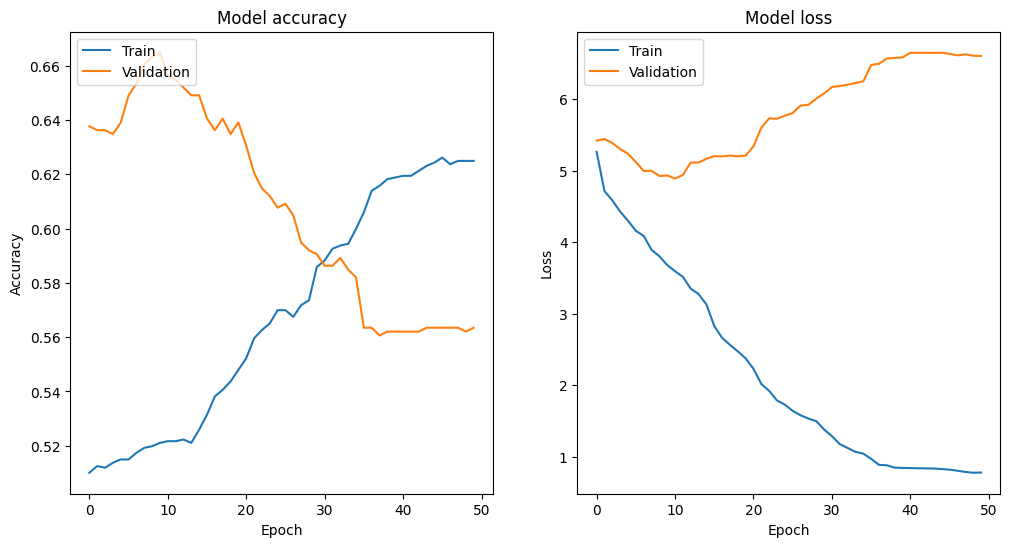

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the training set and validation set

train_loss, train_acc = model.evaluate(X_TRAIN,Y_TRAIN, verbose=0)
train_pred = np.round(model.predict(X_TRAIN)).flatten()

# Calculate other metrics besides accuracy
#train_precision = precision_score(Y_TRAIN, train_pred, zero_division=0)
train_precision = precision_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
train_recall = recall_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
train_f1_score = f1_score(Y_TRAIN, train_pred, average='macro', zero_division=0)

#train_recall = recall_score(Y_TRAIN, train_pred, zero_division=0)
#train_f1_score = f1_score(Y_TRAIN, train_pred, zero_division=0)
print(f'Training loss : {train_loss},Training accuracy: {train_acc}, precision: {train_precision:.2%}, recall: {train_recall:.2%}, f1-score: {train_f1_score:.2%}')


# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_VALID,Y_VALID, verbose=0)
val_pred = np.round(model.predict(X_VALID)).flatten()
# Calculate other metrics besides accuracy
val_precision = precision_score(Y_VALID, val_pred, average='macro', zero_division=0)
val_recall = recall_score(Y_VALID, val_pred, average='macro', zero_division=0)
val_f1_score = f1_score(Y_VALID, val_pred, average='macro', zero_division=0)
#print(val_loss)
print(f'Validation loss:{val_loss},Validation accuracy: {val_acc}, precision: {val_precision:.2%}, recall: {val_recall:.2%}, f1-score: {val_f1_score:.2%}')




import matplotlib.pyplot as plt

# plot the model accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# plot the model loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.show()


22/22 [==============================] - 0s 1ms/step


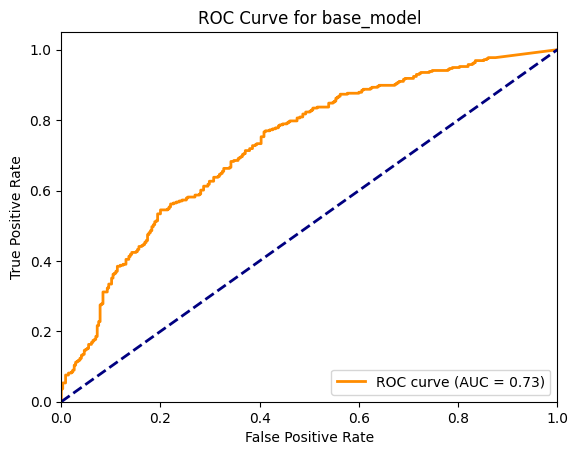

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the saved model weights
model.load_weights(checkpoint_path)

# Predict the class probabilities for the validation set
y_pred = model.predict(X_VALID)

# Calculate the false positive rate and true positive rate for different threshold values
fpr, tpr, thresholds = roc_curve(Y_VALID, y_pred)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for base_model')
plt.legend(loc="lower right")
plt.show()



#Model with 64,32,16,8,1

In [ ]:
model = Sequential()

model.add(Dense(64,activation='relu',input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up model checkpointing
checkpoint_path = "model_save.hdf5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=0)
# Fit the model on the training set
history = model.fit(X_TRAIN, Y_TRAIN, epochs=200, batch_size=32, verbose=0, validation_data=(X_VALID, Y_VALID), callbacks=[cp_callback])

In [ ]:
# Load the best model weights
model.load_weights(checkpoint_path)

52/52 [==============================] - 1s 5ms/step
Training loss: 0.03400499001145363,Training accuracy: 0.9945021271705627, precision: 99.45%, recall: 99.45%, f1-score: 99.45%
22/22 [==============================] - 0s 4ms/step
Validation loss: 0.5943647623062134,Validation accuracy: 0.8930099606513977, precision: 89.79%, recall: 89.22%, f1-score: 89.25%


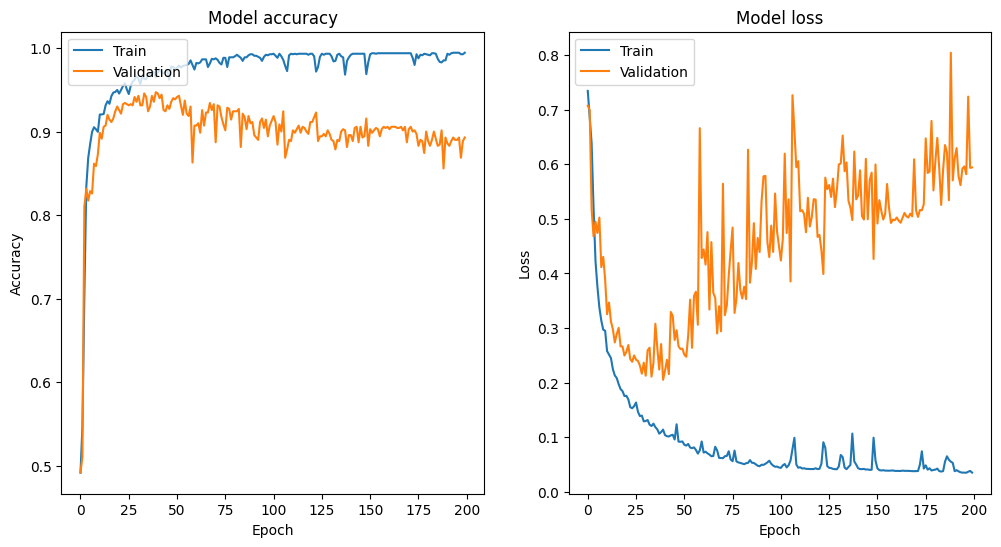

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the training set and validation set

train_loss, train_acc = model.evaluate(X_TRAIN,Y_TRAIN, verbose=0)
train_pred = np.round(model.predict(X_TRAIN)).flatten()

# Calculate other metrics besides accuracy
#train_precision = precision_score(Y_TRAIN, train_pred, zero_division=0)
train_precision = precision_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
train_recall = recall_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
train_f1_score = f1_score(Y_TRAIN, train_pred, average='macro', zero_division=0)

#train_recall = recall_score(Y_TRAIN, train_pred, zero_division=0)
#train_f1_score = f1_score(Y_TRAIN, train_pred, zero_division=0)
print(f'Training loss: {train_loss},Training accuracy: {train_acc}, precision: {train_precision:.2%}, recall: {train_recall:.2%}, f1-score: {train_f1_score:.2%}')





# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_VALID,Y_VALID, verbose=0)
val_pred = np.round(model.predict(X_VALID)).flatten()
# Calculate other metrics besides accuracy
val_precision = precision_score(Y_VALID, val_pred, average='macro', zero_division=0)
val_recall = recall_score(Y_VALID, val_pred, average='macro', zero_division=0)
val_f1_score = f1_score(Y_VALID, val_pred, average='macro', zero_division=0)

print(f'Validation loss: {val_loss},Validation accuracy: {val_acc}, precision: {val_precision:.2%}, recall: {val_recall:.2%}, f1-score: {val_f1_score:.2%}')



import matplotlib.pyplot as plt

# plot the model accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# plot the model loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.show()



22/22 [==============================] - 0s 2ms/step


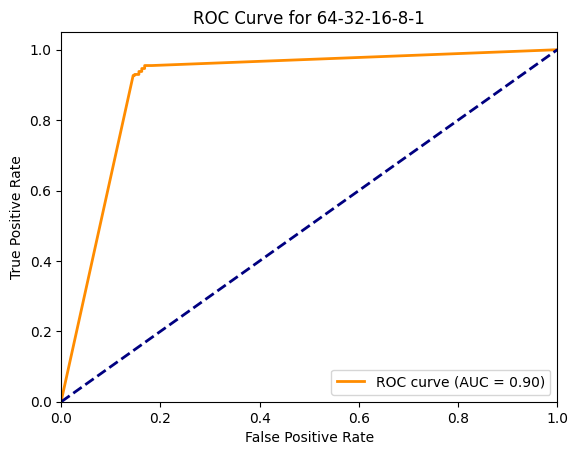

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the saved model weights
model.load_weights(checkpoint_path)

# Predict the class probabilities for the validation set
y_pred = model.predict(X_VALID)

# Calculate the false positive rate and true positive rate for different threshold values
fpr, tpr, thresholds = roc_curve(Y_VALID, y_pred)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 64-32-16-8-1')
plt.legend(loc="lower right")
plt.show()

#Model 2 with 32-16-8-1

In [ ]:
model = Sequential()

model.add(Dense(32,activation='relu',input_shape=(13,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up model checkpointing
checkpoint_path = "model_save.hdf5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=0)
# Fit the model on the training set
history = model.fit(X_TRAIN, Y_TRAIN, epochs=50, batch_size=32, verbose=0, validation_data=(X_VALID, Y_VALID), callbacks=[cp_callback])

# Implementing prediction function

In [ ]:
def my_prediction_function(model, features):
  numOfFeatures = features.shape[1]
  numOfLayers = len(model.layers)
  w = [None]*numOfFeatures
  weights = model.layers[numOfLayers-1].get_weights()[0]
  bias = model.layers[numOfLayers-1].get_weights()[1]   
  z = 0
  for i in range(min(numOfFeatures, weights.shape[0])):
    w[i] = weights[i][0]
    z = z + features.iloc[:,i]*w[i]
  z = z + bias
  result = 1/(1+np.exp(-z))
  return result 

# Example usage with validation data
#val_predictions = my_prediction_function(model, X_VALID[0:10])
print(val_predictions)
val_predictions = my_prediction_function(model, X_VALID)
val_predictions_classes = (val_predictions > 0.5).astype(int)  # convert probabilities to classes
accuracy = np.mean(val_predictions_classes == Y_VALID) * 100
print(f"Validation accuracy: {accuracy:.2f}%")



0      1.000000
1      0.417127
2      0.906141
3      1.000000
4      1.000000
         ...   
696    1.000000
697    1.000000
698    1.000000
699    1.000000
700    1.000000
Length: 701, dtype: float64
Validation accuracy: 51.78%


In [ ]:
# Load the best model weights
model.load_weights(checkpoint_path)

Training loss:0.10282442718744278,Training accuracy: 0.9688454270362854, precision: 99.57%, recall: 99.57%, f1-score: 99.57%
22/22 [==============================] - 0s 1ms/step
Validation loss: 3.0519447326660156,Validation accuracy: 0.9429386854171753, precision: 94.43%, recall: 94.34%, f1-score: 94.29%


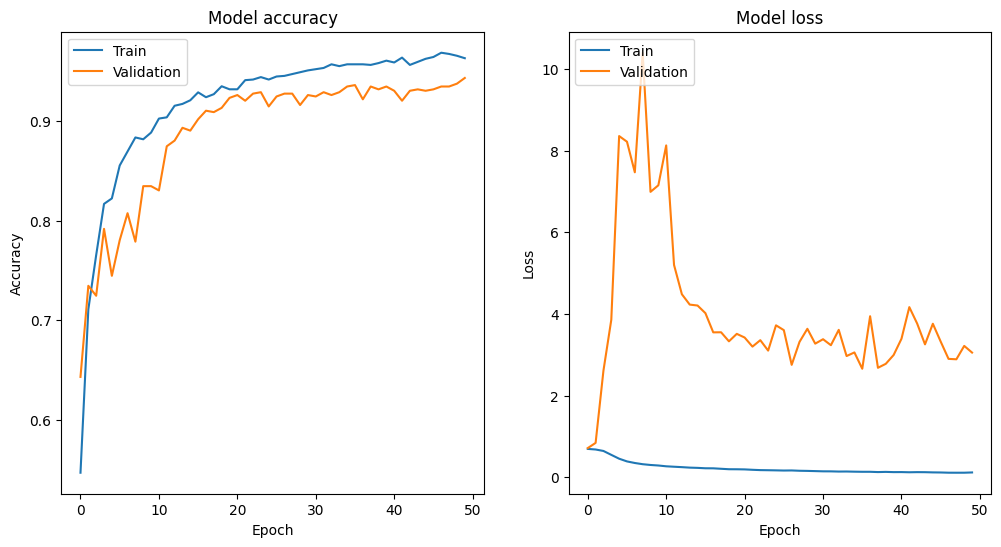

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_TRAIN, Y_TRAIN, verbose=0)
#train_pred = np.round(model.predict(XTRAIN)).flatten()
# Calculate other metrics besides accuracy
train_precision = precision_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
train_recall = recall_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
train_f1_score = f1_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
print(f'Training loss:{train_loss},Training accuracy: {train_acc}, precision: {train_precision:.2%}, recall: {train_recall:.2%}, f1-score: {train_f1_score:.2%}')


# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_VALID, Y_VALID, verbose=0)

val_pred = np.round(model.predict(X_VALID)).flatten()
#print(val_pred)
# Calculate other metrics besides accuracy
val_precision = precision_score(Y_VALID, val_pred, average='macro', zero_division=0)
val_recall = recall_score(Y_VALID, val_pred, average='macro', zero_division=0)
val_f1_score = f1_score(Y_VALID, val_pred, average='macro', zero_division=0)
print(f'Validation loss: {val_loss},Validation accuracy: {val_acc}, precision: {val_precision:.2%}, recall: {val_recall:.2%}, f1-score: {val_f1_score:.2%}')


import matplotlib.pyplot as plt

# plot the model accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# plot the model loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.show()


22/22 [==============================] - 0s 2ms/step


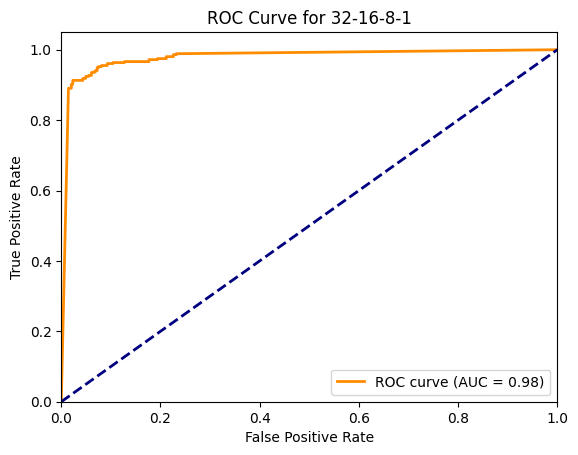

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the saved model weights
model.load_weights(checkpoint_path)

# Predict the class probabilities for the validation set
y_pred = model.predict(X_VALID)

# Calculate the false positive rate and true positive rate for different threshold values
fpr, tpr, thresholds = roc_curve(Y_VALID, y_pred)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 32-16-8-1')
plt.legend(loc="lower right")
plt.show()

#Model-3 with 16,8,1 neurons

In [ ]:
model = Sequential()

model.add(Dense(16,activation='relu',input_shape=(13,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Set up model checkpointing

checkpoint_path = "model_save.hdf5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=0)
# Fit the model on the training set
history = model.fit(X_TRAIN, Y_TRAIN, epochs=20, batch_size=32, verbose=0, validation_data=(X_VALID, Y_VALID), callbacks=[cp_callback])

In [ ]:
# Load the best model weights
model.load_weights(checkpoint_path)

Training loss; 0.4396252930164337Training accuracy: 0.8191814422607422, precision: 99.57%, recall: 99.57%, f1-score: 99.57%
22/22 [==============================] - 0s 3ms/step
Validation loss: 5.995141506195068,Validation accuracy: 0.6034236550331116, precision: 2.94%, recall: 0.57%, f1-score: 0.96%


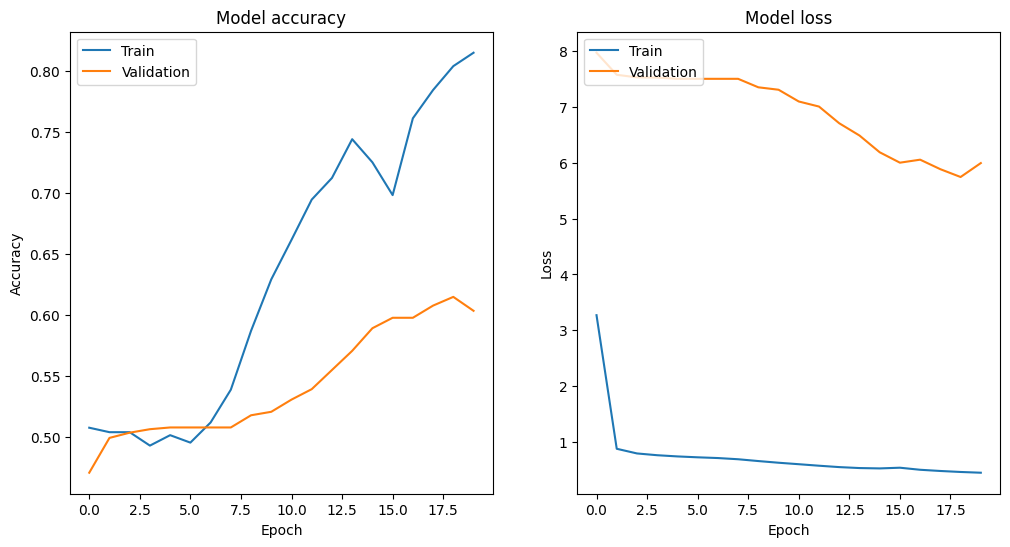

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_TRAIN, Y_TRAIN, verbose=0)
#train_pred = np.round(model.predict(XTRAIN)).flatten()
# Calculate other metrics besides accuracy
train_precision = precision_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
train_recall = recall_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
train_f1_score = f1_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
print(f'Training loss; {train_loss}Training accuracy: {train_acc}, precision: {train_precision:.2%}, recall: {train_recall:.2%}, f1-score: {train_f1_score:.2%}')



# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_VALID, Y_VALID, verbose=0)

val_pred = np.round(model.predict(X_VALID)).flatten()
#print(val_pred)
# Calculate other metrics besides accuracy
val_precision = precision_score(Y_VALID, val_pred, average='macro', zero_division=0)
val_recall = recall_score(Y_VALID, val_pred, average='macro', zero_division=0)
val_f1_score = f1_score(Y_VALID, val_pred, average='macro', zero_division=0)
print(f'Validation loss: {val_loss},Validation accuracy: {val_acc}, precision: {val_precision:.2%}, recall: {val_recall:.2%}, f1-score: {val_f1_score:.2%}')


import matplotlib.pyplot as plt

# plot the model accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# plot the model loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.show()


22/22 [==============================] - 0s 4ms/step


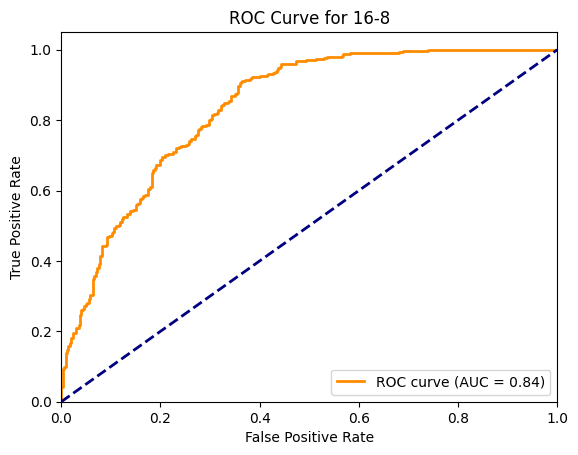

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the saved model weights
model.load_weights(checkpoint_path)

# Predict the class probabilities for the validation set
y_pred = model.predict(X_VALID)

# Calculate the false positive rate and true positive rate for different threshold values
fpr, tpr, thresholds = roc_curve(Y_VALID, y_pred)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 16-8')
plt.legend(loc="lower right")
plt.show()

#model-4 with 8,1 neurons

In [ ]:
model = Sequential()

model.add(Dense(8,activation='relu',input_shape=(13,)))
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Set up model checkpointing

checkpoint_path = "model_save.hdf5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=0)
# Fit the model on the training set
history = model.fit(X_TRAIN, Y_TRAIN, epochs=20, batch_size=32, verbose=0, validation_data=(X_VALID, Y_VALID), callbacks=[cp_callback])

In [ ]:
# Load the best model weights
model.load_weights(checkpoint_path)

Training loss: 0.4176133871078491,Training accuracy: 0.8216249346733093, precision: 99.57%, recall: 99.57%, f1-score: 99.57%
22/22 [==============================] - 0s 2ms/step
Validation loss: 6.0990118980407715,Validation accuracy: 0.5977175235748291, precision: 2.14%, recall: 0.40%, f1-score: 0.68%


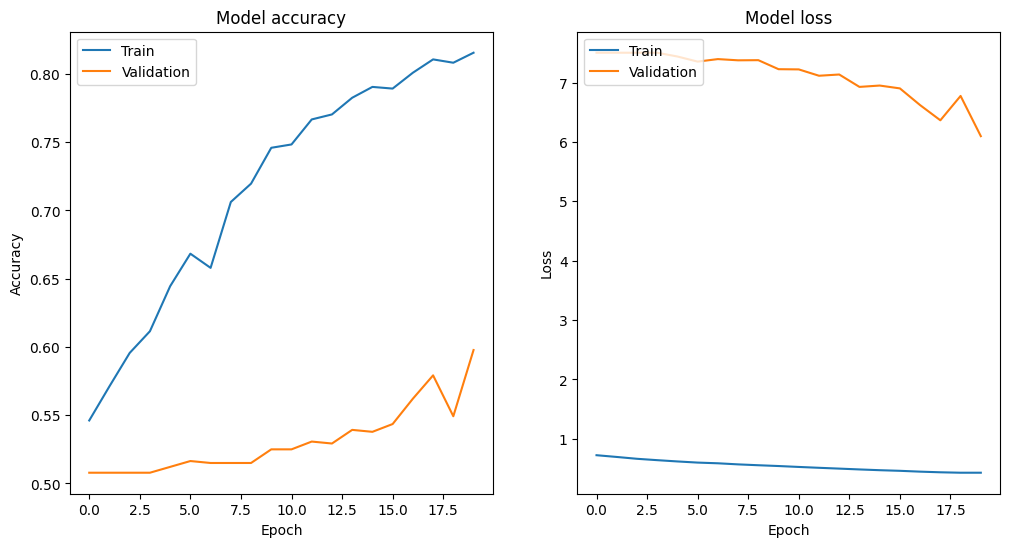

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_TRAIN, Y_TRAIN, verbose=0)
#train_pred = np.round(model.predict(XTRAIN)).flatten()
# Calculate other metrics besides accuracy
train_precision = precision_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
train_recall = recall_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
train_f1_score = f1_score(Y_TRAIN, train_pred, average='macro', zero_division=0)
print(f'Training loss: {train_loss},Training accuracy: {train_acc}, precision: {train_precision:.2%}, recall: {train_recall:.2%}, f1-score: {train_f1_score:.2%}')




# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_VALID, Y_VALID, verbose=0)

val_pred = np.round(model.predict(X_VALID)).flatten()
#print(val_pred)
# Calculate other metrics besides accuracy
val_precision = precision_score(Y_VALID, val_pred, average='macro', zero_division=0)
val_recall = recall_score(Y_VALID, val_pred, average='macro', zero_division=0)
val_f1_score = f1_score(Y_VALID, val_pred, average='macro', zero_division=0)
print(f'Validation loss: {val_loss},Validation accuracy: {val_acc}, precision: {val_precision:.2%}, recall: {val_recall:.2%}, f1-score: {val_f1_score:.2%}')


import matplotlib.pyplot as plt

# plot the model accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# plot the model loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.show()


22/22 [==============================] - 0s 2ms/step


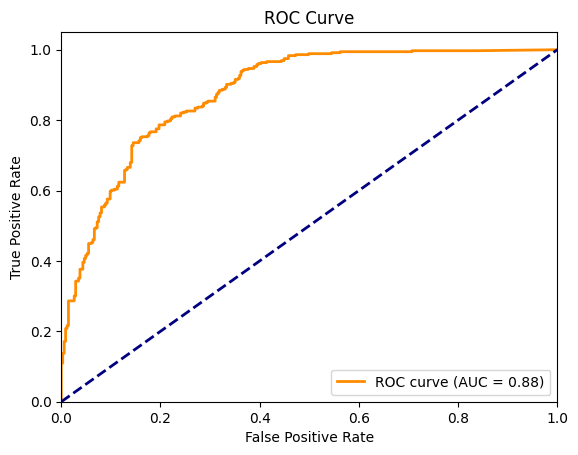

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the saved model weights
model.load_weights(checkpoint_path)

# Predict the class probabilities for the validation set
y_pred = model.predict(X_VALID)

# Calculate the false positive rate and true positive rate for different threshold values
fpr, tpr, thresholds = roc_curve(Y_VALID, y_pred)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_TRAIN, Y_TRAIN)

# Make predictions on the training and validation data
train_pred = logreg.predict(X_TRAIN)
val_pred = logreg.predict(X_VALID)

# Evaluate the model on the training and validation data
train_accuracy = accuracy_score(Y_TRAIN, train_pred)

val_accuracy = accuracy_score(Y_VALID, val_pred)


# Print the performance metrics
print("Training accuracy:", train_accuracy)

print("------------------------------------")
print("Validation accuracy:", val_accuracy)



Training accuracy: 0.8747709224190593
------------------------------------
Validation accuracy: 0.8202567760342369


#Phase-4 
Feature Reduction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the data from the CSV file
#data = pd.read_csv('data.csv')

# Split the data into train and validation sets
train_data = df.iloc[int(0.3 * len(df)):]
val_data = df.iloc[:int(0.3 * len(df))]


# Define the list of input features
input_features = [ 'Phoenix Feather', 'Unicorn Horn', "Dragon's Blood", 'Mermaid Tears', 'Fairy Dust', 'Goblin Toes', "Witch's Brew", 'Griffin Claw', 'Troll Hair', 'Kraken Ink','Minotaur Horn','Basilisk Scale','Chimera Fang' ]

# Scale the input data
scaler = StandardScaler()
train_data[input_features] = scaler.fit_transform(train_data[input_features])
val_data[input_features] = scaler.transform(val_data[input_features])

# Train a model for each input feature
model_accuracies = []
for feature in input_features:
    # Split the data into input and output
    X_train = train_data[[feature]]
    y_train = train_data['Cured']
    X_val = val_data[[feature]]
    y_val = val_data['Cured']
    
    # Define the neural network model
    model = keras.Sequential([
        keras.layers.Dense(10, activation='relu', input_dim=1),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=5, verbose=0)
    
    # Evaluate the model on the validation set
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
    model_accuracies.append(accuracy)

    print(model_accuracies)




[0.5106989741325378]
[0.5106989741325378, 0.5135520696640015]
[0.5106989741325378, 0.5135520696640015, 0.52781742811203]
[0.5106989741325378, 0.5135520696640015, 0.52781742811203, 0.4821683168411255]
[0.5106989741325378, 0.5135520696640015, 0.52781742811203, 0.4821683168411255, 0.5192582011222839]
[0.5106989741325378, 0.5135520696640015, 0.52781742811203, 0.4821683168411255, 0.5192582011222839, 0.4850214123725891]
[0.5106989741325378, 0.5135520696640015, 0.52781742811203, 0.4821683168411255, 0.5192582011222839, 0.4850214123725891, 0.5934379696846008]
[0.5106989741325378, 0.5135520696640015, 0.52781742811203, 0.4821683168411255, 0.5192582011222839, 0.4850214123725891, 0.5934379696846008, 0.49500712752342224]
[0.5106989741325378, 0.5135520696640015, 0.52781742811203, 0.4821683168411255, 0.5192582011222839, 0.4850214123725891, 0.5934379696846008, 0.49500712752342224, 0.6975749135017395]
[0.5106989741325378, 0.5135520696640015, 0.52781742811203, 0.4821683168411255, 0.5192582011222839, 0.48

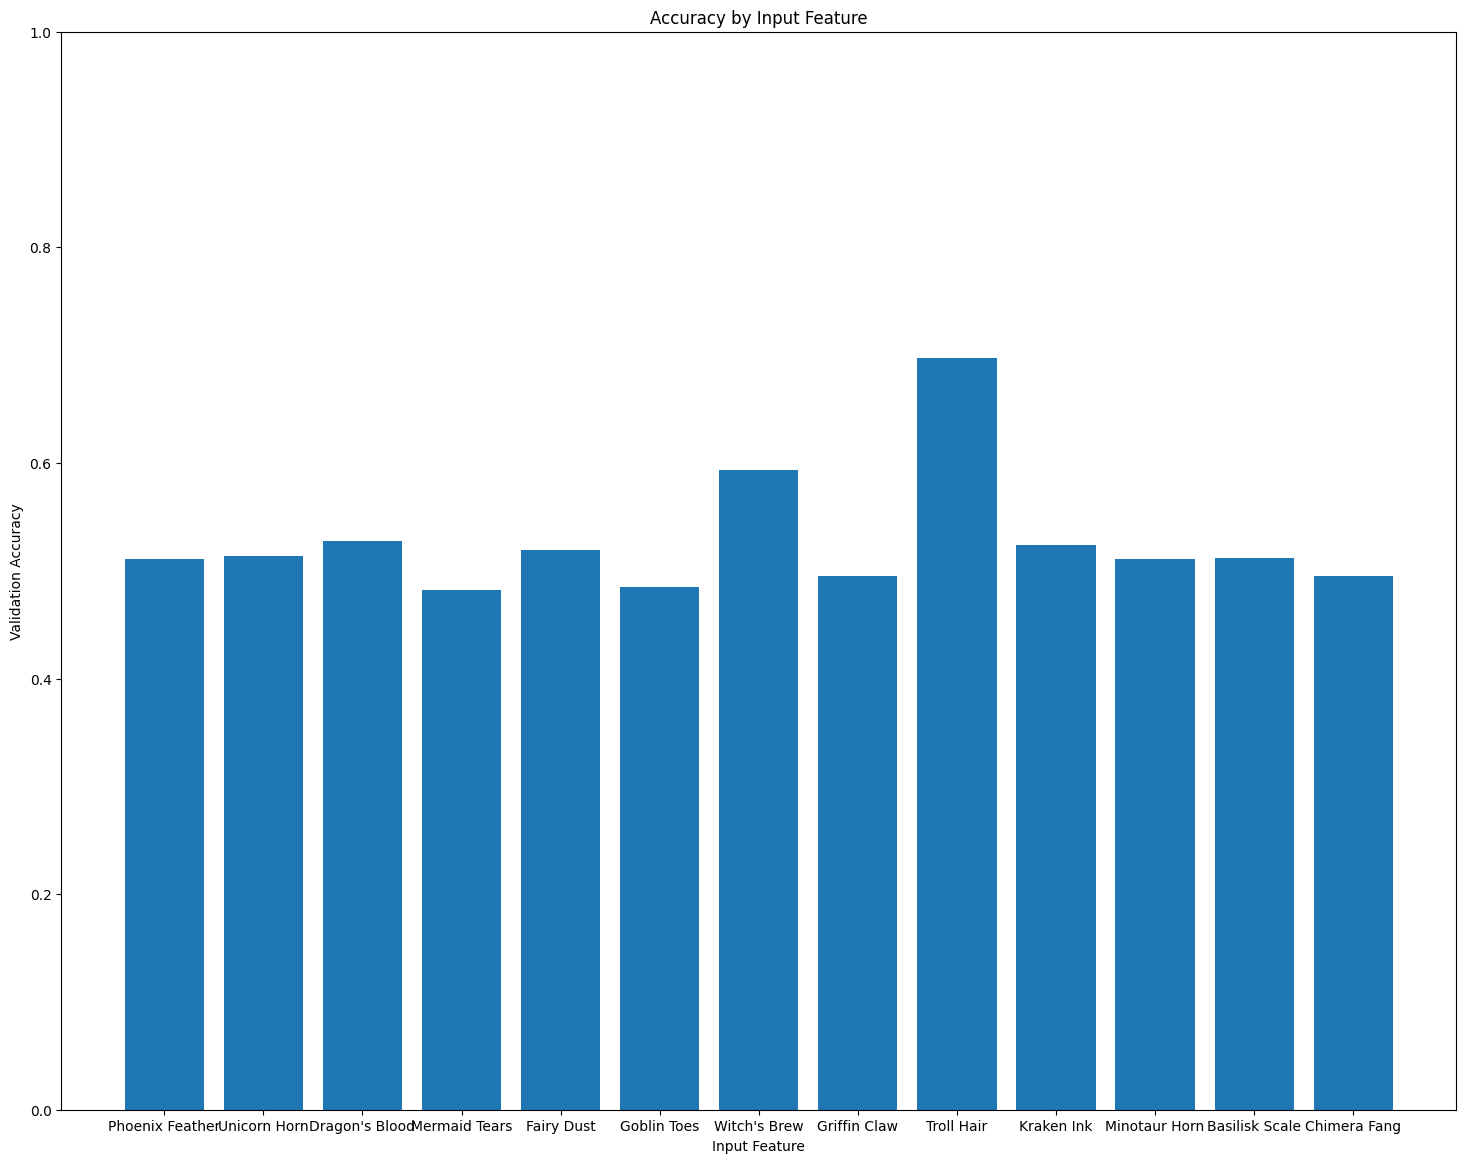

In [ ]:


import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(18,14))
plt.bar(input_features, model_accuracies)
plt.ylim(0, 1.0)
plt.xlabel('Input Feature')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy by Input Feature')

# Save the plot as a PNG image file)
plt.savefig('accuracy_by_input_feature.png')


In [ ]:
# Identify the most important feature
most_important_feature = input_features[model_accuracies.index(max(model_accuracies))]
print(most_important_feature)
# Remove unimportant features iteratively
feature_removal_accuracies = []
removed_features = []
while len(input_features) > 1:
    # Train a model with one less feature
    removed_feature = input_features.pop(0)
    removed_features.append(removed_feature)
    print(removed_features)
    X_train = train_data[input_features]
    y_train = train_data['Cured']
    X_val = val_data[input_features]
    y_val = val_data['Cured']
    
    # Define the neural network model
    model = keras.Sequential([
        keras.layers.Dense(10, activation='relu', input_dim=len(input_features)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=5, verbose=0)
    
    # Evaluate the model on the validation set
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(accuracy)
    feature_removal_accuracies.append(accuracy)
    print(feature_removal_accuracies)



Troll Hair
['Phoenix Feather']
0.7532097101211548
[0.7532097101211548]
['Phoenix Feather', 'Unicorn Horn']
0.8059914112091064
[0.7532097101211548, 0.8059914112091064]
['Phoenix Feather', 'Unicorn Horn', "Dragon's Blood"]
0.7261055707931519
[0.7532097101211548, 0.8059914112091064, 0.7261055707931519]
['Phoenix Feather', 'Unicorn Horn', "Dragon's Blood", 'Mermaid Tears']
0.7175463438034058
[0.7532097101211548, 0.8059914112091064, 0.7261055707931519, 0.7175463438034058]
['Phoenix Feather', 'Unicorn Horn', "Dragon's Blood", 'Mermaid Tears', 'Fairy Dust']
0.6661911606788635
[0.7532097101211548, 0.8059914112091064, 0.7261055707931519, 0.7175463438034058, 0.6661911606788635]
['Phoenix Feather', 'Unicorn Horn', "Dragon's Blood", 'Mermaid Tears', 'Fairy Dust', 'Goblin Toes']
0.7375178337097168
[0.7532097101211548, 0.8059914112091064, 0.7261055707931519, 0.7175463438034058, 0.6661911606788635, 0.7375178337097168]
['Phoenix Feather', 'Unicorn Horn', "Dragon's Blood", 'Mermaid Tears', 'Fairy Dust'

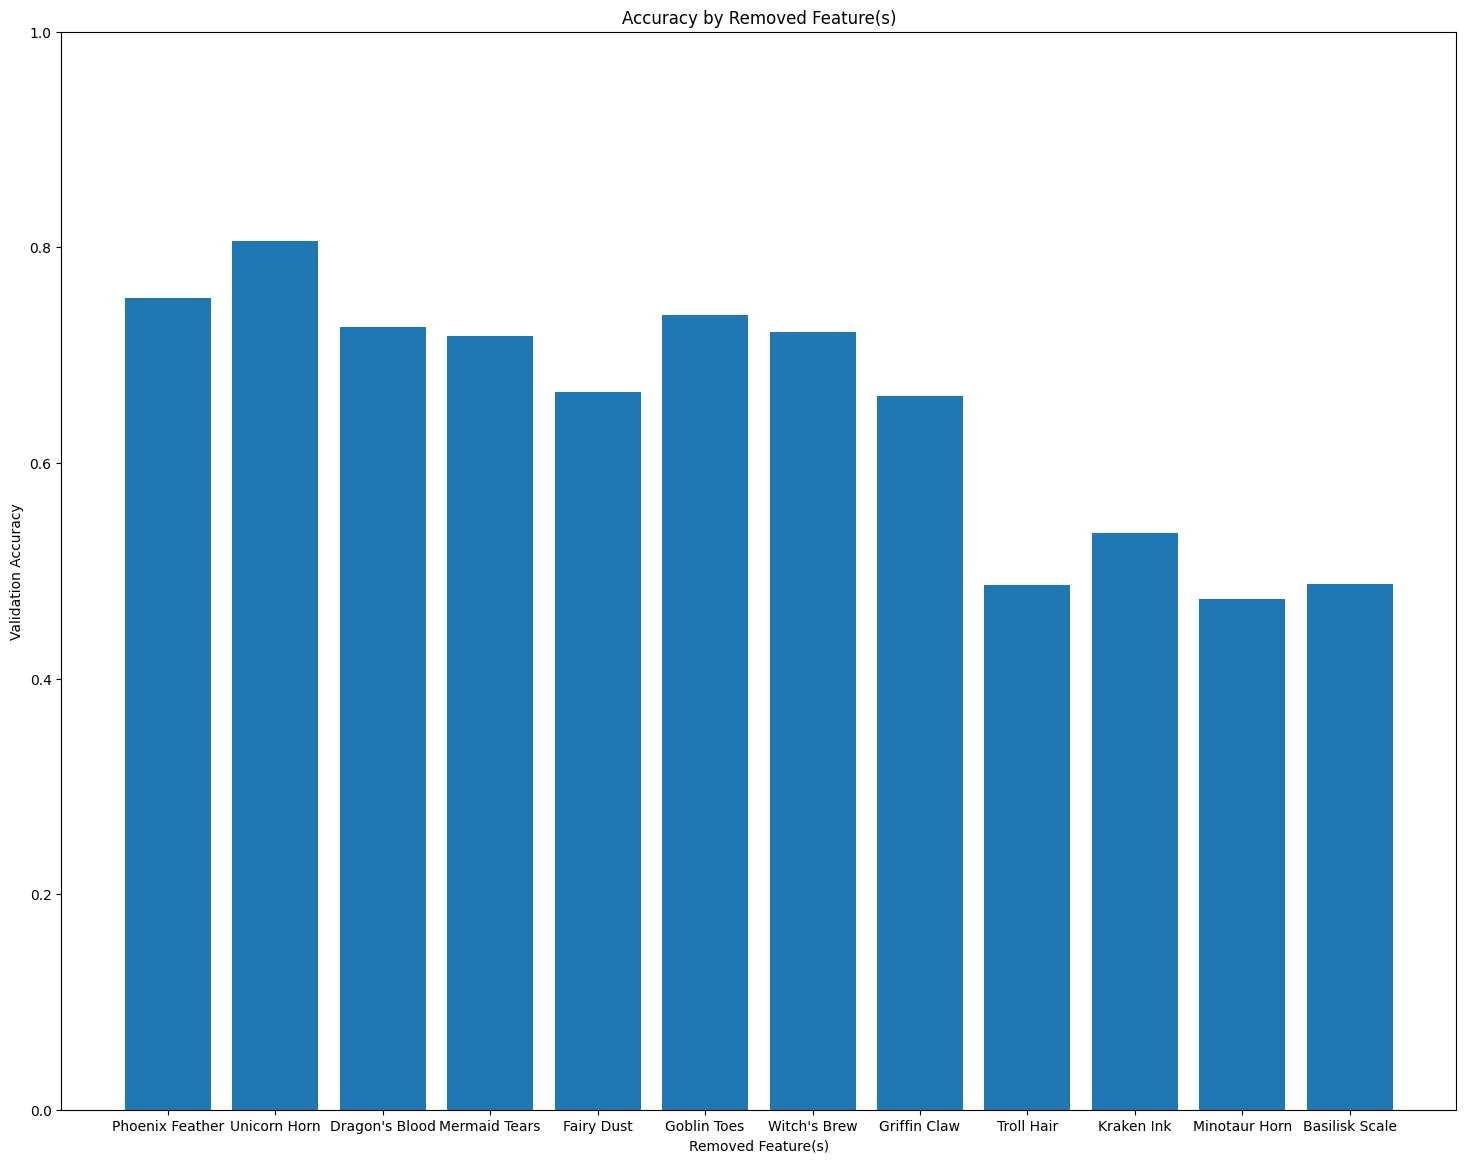

In [ ]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(18,14))
plt.bar(removed_features, feature_removal_accuracies)
plt.ylim(0, 1.0)
plt.xlabel('Removed Feature(s)')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy by Removed Feature(s)')

# Save the plot as a PNG image file
plt.savefig('accuracy_by_removed_features.png')
